# Plotting Experimental Results

This notebooks analyzes and plots the collected results store in the `reports` folder. The results are stored in CSV files.

## Setup

In [127]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [130]:
palette = ['#83B8FE', '#FFA54C', '#94ED67', '#FF7FFF']

In [128]:
active_col = 'Active (Dmax 0.6, pDC50 6.0)'
test_split = 0.1
n_models_for_test = 3
cv_n_folds = 5

active_name = active_col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')
report_base_name = f'{active_name}_test_split_{test_split}'

# TODO: Maybe a function to get the experiment dataframes would help...
# def get_experiment_df(experiment_name, report, splits=['random', 'uniprot', 'tanimoto']):
#     for split in splits:
#         df = []
#         for report_name in ['cv', 'ablation', 'hparam', 'majority_vote']:
#             filename = f'reports/{report_name}_report_{report_base_name}_{split}.csv'
#             df.append(pd.read_csv(filename))
#         report[experiment_name] = pd.concat(df)
#     return report

# Load the data
reports = {
    'cv_train': pd.concat([
        pd.read_csv(f'reports/cv_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/cv_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/cv_report_{report_base_name}_tanimoto.csv'),
    ]),
    'test': pd.concat([
        pd.read_csv(f'reports/test_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/test_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/test_report_{report_base_name}_tanimoto.csv'),
    ]),
    'ablation': pd.concat([
        pd.read_csv(f'reports/ablation_zero_vectors_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/ablation_zero_vectors_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/ablation_zero_vectors_report_{report_base_name}_tanimoto.csv'),
    ]),
    'hparam': pd.concat([
        pd.read_csv(f'reports/hparam_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/hparam_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/hparam_report_{report_base_name}_tanimoto.csv'),
    ]),
    'majority_vote': pd.concat([
        pd.read_csv(f'reports/majority_vote_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/majority_vote_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/majority_vote_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_cv_train': pd.concat([
        pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_test': pd.concat([
        pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_hparam': pd.concat([
        pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_tanimoto.csv'),
    ]),
    'xgboost_majority_vote': pd.concat([
        pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_random.csv'),
        pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_uniprot.csv'),
        pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_tanimoto.csv'),
    ]),
}
for experiment in ['cellsonehot', 'aminoacidcnt']:
    reports[f'{experiment}_cv_train'] = pd.concat([
        pd.read_csv(f'reports/{experiment}_cv_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}_cv_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}_cv_report_{report_base_name}_similarity.csv'),
    ])
    reports[f'{experiment}_test'] = pd.concat([
        pd.read_csv(f'reports/{experiment}_test_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}_test_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}_test_report_{report_base_name}_similarity.csv'),
    ])
    reports[f'{experiment}_hparam'] = pd.concat([
        pd.read_csv(f'reports/{experiment}_hparam_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}_hparam_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}_hparam_report_{report_base_name}_similarity.csv'),
    ])
    reports[f'{experiment}_majority_vote'] = pd.concat([
        pd.read_csv(f'reports/{experiment}_majority_vote_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}_majority_vote_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}_majority_vote_report_{report_base_name}_similarity.csv'),
    ])

for k, report in reports.items():
    print(f'{k}: {report.shape}')
    display(report.head())

cv_train: (15, 52)


,model_type,fold,train_len,val_len,train_perc,val_perc,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,val_active_perc,...,val_roc_auc,test_loss,test_acc,test_f1_score,test_precision,test_recall,test_roc_auc,split_type,train_unique_groups,val_unique_groups
0,Pytorch,0,616,155,0.798962,0.201038,0.514610,0.485390,0.376475,0.516129,...,0.904333,0.661766,0.802326,0.817204,0.716981,0.95,0.860326,random,NaN,NaN
1,Pytorch,1,617,154,0.800259,0.199741,0.513776,0.486224,0.377372,0.519481,...,0.924493,0.658051,0.755814,0.764045,0.693878,0.85,0.858152,random,NaN,NaN
2,Pytorch,2,617,154,0.800259,0.199741,0.515397,0.484603,0.376572,0.512987,...,0.931139,0.611611,0.779070,0.781609,0.723404,0.85,0.863587,random,NaN,NaN
3,Pytorch,3,617,154,0.800259,0.199741,0.515397,0.484603,0.376068,0.512987,...,0.924557,0.693243,0.732558,0.747253,0.666667,0.85,0.847826,random,NaN,NaN
4,Pytorch,4,617,154,0.800259,0.199741,0.515397,0.484603,0.377543,0.512987,...,0.927257,0.561546,0.779070,0.781609,0.723404,0.85,0.878804,random,NaN,NaN


test: (9, 34)


,train_loss,train_loss_step,train_loss_epoch,train_acc,train_acc_epoch,train_f1_score,train_f1_score_epoch,train_precision,train_precision_epoch,train_recall,...,train_avg_tanimoto_dist,test_len,test_active_perc,test_inactive_perc,test_avg_tanimoto_dist,num_leaking_uniprot_train_test,num_leaking_smiles_train_test,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test,split_type
0,0.190532,0.307893,0.190532,0.939547,0.939547,0.940150,0.940150,0.930864,0.930864,0.949622,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
1,0.188614,0.163636,0.188614,0.940806,0.940806,0.941760,0.941760,0.926829,0.926829,0.957179,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
2,0.189793,0.201865,0.189793,0.942065,0.942065,0.942786,0.942786,0.931204,0.931204,0.954660,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
0,0.543100,0.583436,0.543100,0.809463,0.809463,0.820265,0.820265,0.776256,0.776256,0.869565,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot
1,0.649270,0.631336,0.649270,0.767263,0.767263,0.795964,0.795964,0.708583,0.708583,0.907928,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot


ablation: (84, 23)


,test_loss,test_acc,test_f1_score,test_precision,test_recall,test_roc_auc,train_len,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,...,test_avg_tanimoto_dist,num_leaking_uniprot_train_test,num_leaking_smiles_train_test,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test,majority_vote,model_type,disabled_embeddings,test_f1,split_type
0,0.726923,0.604651,0.673077,0.546875,0.875,0.717391,771,0.514916,0.485084,0.376806,...,0.381147,34,44,0.832685,0.102464,False,Pytorch,disabled e3,NaN,random
1,0.697167,0.616279,0.535211,0.612903,0.475,0.671739,771,0.514916,0.485084,0.376806,...,0.381147,34,44,0.832685,0.102464,False,Pytorch,disabled e3,NaN,random
2,0.654254,0.639535,0.643678,0.595745,0.700,0.714131,771,0.514916,0.485084,0.376806,...,0.381147,34,44,0.832685,0.102464,False,Pytorch,disabled e3,NaN,random
3,NaN,0.616279,NaN,0.629630,0.425,0.689674,771,0.514916,0.485084,0.376806,...,0.381147,34,44,0.832685,0.102464,True,Pytorch,disabled e3,0.507463,random
4,0.744749,0.593023,0.653465,0.540984,0.825,0.709239,771,0.514916,0.485084,0.376806,...,0.381147,34,44,0.832685,0.102464,False,Pytorch,disabled poi,NaN,random


hparam: (3, 7)


,hidden_dim,learning_rate,smote_k_neighbors,use_smote,dropout,use_batch_norm,split_type
0,128,0.000925,10,True,0.216350,True,random
0,32,0.000649,4,True,0.092638,False,uniprot
0,64,0.000771,13,False,0.304535,True,tanimoto


majority_vote: (6, 28)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1_score,train_len,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,test_len,...,val_active_perc,val_inactive_perc,val_avg_tanimoto_dist,num_leaking_uniprot_train_val,num_leaking_smiles_train_val,perc_leaking_uniprot_train_val,perc_leaking_smiles_train_val,cv_models,model_type,split_type
0,0.825581,0.847826,0.777778,0.875000,0.823529,771,0.514916,0.485084,0.376806,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,random
1,0.813953,0.868478,0.815789,0.775000,0.794872,617,0.515397,0.484603,0.377543,86,...,0.512987,0.487013,0.373853,40.0,70.0,0.910859,0.176661,True,Pytorch,random
0,0.611765,0.614827,0.675676,0.543478,0.602410,772,0.506477,0.493523,0.375305,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,uniprot
1,0.411765,0.549610,0.400000,0.173913,0.242424,693,0.484848,0.515152,0.377092,85,...,0.696203,0.303797,0.359625,0.0,8.0,0.000000,0.014430,True,Pytorch,uniprot
0,0.705882,0.823761,0.772727,0.459459,0.576271,772,0.518135,0.481865,0.372540,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,tanimoto


xgboost_cv_train: (15, 24)


,model_type,fold,train_len,val_len,train_perc,val_perc,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,val_active_perc,...,perc_leaking_uniprot_train_val,perc_leaking_smiles_train_val,val_acc,val_roc_auc,val_precision,val_recall,val_f1_score,split_type,train_unique_groups,val_unique_groups
0,XGBoost,0,616,155,0.798962,0.201038,0.514610,0.485390,0.376475,0.516129,...,0.886364,0.146104,0.838710,0.917167,0.816092,0.887500,0.850299,random,NaN,NaN
1,XGBoost,1,617,154,0.800259,0.199741,0.513776,0.486224,0.377372,0.519481,...,0.920583,0.188006,0.883117,0.959291,0.860465,0.925000,0.891566,random,NaN,NaN
2,XGBoost,2,617,154,0.800259,0.199741,0.515397,0.484603,0.376572,0.512987,...,0.914100,0.144246,0.876623,0.917975,0.894737,0.860759,0.877419,random,NaN,NaN
3,XGBoost,3,617,154,0.800259,0.199741,0.515397,0.484603,0.376068,0.512987,...,0.876823,0.162075,0.883117,0.937384,0.858824,0.924051,0.890244,random,NaN,NaN
4,XGBoost,4,617,154,0.800259,0.199741,0.515397,0.484603,0.377543,0.512987,...,0.910859,0.176661,0.883117,0.939241,0.858824,0.924051,0.890244,random,NaN,NaN


xgboost_test: (9, 20)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1_score,model_type,test_model_id,train_len,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,test_len,test_active_perc,test_inactive_perc,test_avg_tanimoto_dist,num_leaking_uniprot_train_test,num_leaking_smiles_train_test,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test,split_type
0,0.767442,0.879348,0.700000,0.875000,0.777778,XGBoost,0,771,0.514916,0.485084,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
1,0.790698,0.884239,0.711538,0.925000,0.804348,XGBoost,1,771,0.514916,0.485084,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
2,0.767442,0.882065,0.692308,0.900000,0.782609,XGBoost,2,771,0.514916,0.485084,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,random
0,0.447059,0.499443,0.482759,0.304348,0.373333,XGBoost,0,772,0.506477,0.493523,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot
1,0.517647,0.486065,0.567568,0.456522,0.506024,XGBoost,1,772,0.506477,0.493523,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,uniprot


xgboost_hparam: (3, 7)


,eta,max_depth,min_child_weight,gamma,subsample,colsample_bytree,split_type
0,0.098975,9,0.013528,0.000218,0.851506,0.630858,random
0,0.025540,3,0.051810,0.007490,0.514577,0.883731,uniprot
0,0.000391,10,0.027727,0.013472,0.649744,0.511964,tanimoto


xgboost_majority_vote: (3, 7)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1_score,model_type,split_type
0,0.779070,0.880978,0.723404,0.850000,0.781609,XGBoost,random
0,0.447059,0.487179,0.481481,0.282609,0.356164,XGBoost,uniprot
0,0.717647,0.831081,0.842105,0.432432,0.571429,XGBoost,tanimoto


cellsonehot_cv_train: (15, 52)


,model_type,fold,train_len,val_len,train_perc,val_perc,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,val_active_perc,...,val_roc_auc,test_loss,test_acc,test_f1_score,test_precision,test_recall,test_roc_auc,split_type,train_unique_groups,val_unique_groups
0,Pytorch,0,616,155,0.798962,0.201038,0.514610,0.485390,0.376475,0.516129,...,0.918667,0.625937,0.767442,0.782609,0.692308,0.900,0.816304,standard,NaN,NaN
1,Pytorch,1,617,154,0.800259,0.199741,0.513776,0.486224,0.377372,0.519481,...,0.916047,0.564669,0.720930,0.744681,0.648148,0.875,0.845652,standard,NaN,NaN
2,Pytorch,2,617,154,0.800259,0.199741,0.515397,0.484603,0.376572,0.512987,...,0.898903,0.564599,0.732558,0.752688,0.660377,0.875,0.825543,standard,NaN,NaN
3,Pytorch,3,617,154,0.800259,0.199741,0.515397,0.484603,0.376068,0.512987,...,0.910717,0.566597,0.755814,0.764045,0.693878,0.850,0.836413,standard,NaN,NaN
4,Pytorch,4,617,154,0.800259,0.199741,0.515397,0.484603,0.377543,0.512987,...,0.908692,0.538316,0.802326,0.808989,0.734694,0.900,0.856522,standard,NaN,NaN


cellsonehot_test: (9, 34)


,train_loss,train_loss_step,train_loss_epoch,train_acc,train_acc_epoch,train_f1_score,train_f1_score_epoch,train_precision,train_precision_epoch,train_recall,...,train_avg_tanimoto_dist,test_len,test_active_perc,test_inactive_perc,test_avg_tanimoto_dist,num_leaking_uniprot_train_test,num_leaking_smiles_train_test,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test,split_type
0,0.409341,0.762586,0.409341,0.811933,0.811933,0.828808,0.828808,0.780000,0.780000,0.884131,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,standard
1,0.392072,0.457777,0.392072,0.801556,0.801556,0.821470,0.821470,0.765217,0.765217,0.886650,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,standard
2,0.404924,0.757534,0.404924,0.797665,0.797665,0.815166,0.815166,0.769575,0.769575,0.866499,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,standard
0,0.449669,0.444385,0.449669,0.797954,0.797954,0.821267,0.821267,0.736308,0.736308,0.928389,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,target
1,0.455240,0.706470,0.455240,0.792839,0.792839,0.816327,0.816327,0.733198,0.733198,0.920716,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,target


cellsonehot_hparam: (3, 7)


,hidden_dim,learning_rate,smote_k_neighbors,use_smote,dropout,use_batch_norm,split_type
0,64,0.000546,3,False,0.492936,True,standard
0,16,0.000547,8,True,0.182592,True,target
0,256,0.000487,12,False,0.146986,True,similarity


cellsonehot_majority_vote: (6, 28)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1_score,train_len,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,test_len,...,val_active_perc,val_inactive_perc,val_avg_tanimoto_dist,num_leaking_uniprot_train_val,num_leaking_smiles_train_val,perc_leaking_uniprot_train_val,perc_leaking_smiles_train_val,cv_models,model_type,split_type
0,0.651163,0.722826,0.604167,0.725000,0.659091,771,0.514916,0.485084,0.376806,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,standard
1,0.790698,0.852717,0.761905,0.800000,0.780488,617,0.515397,0.484603,0.377543,86,...,0.512987,0.487013,0.373853,40.0,70.0,0.910859,0.176661,True,Pytorch,standard
0,0.458824,0.619844,0.500000,0.260870,0.342857,772,0.506477,0.493523,0.375305,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,target
1,0.529412,0.583612,0.650000,0.282609,0.393939,693,0.484848,0.515152,0.377092,85,...,0.696203,0.303797,0.359625,0.0,8.0,0.000000,0.014430,True,Pytorch,target
0,0.658824,0.715653,0.750000,0.324324,0.452830,772,0.518135,0.481865,0.372540,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,similarity


aminoacidcnt_cv_train: (15, 52)


,model_type,fold,train_len,val_len,train_perc,val_perc,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,val_active_perc,...,val_roc_auc,test_loss,test_acc,test_f1_score,test_precision,test_recall,test_roc_auc,split_type,train_unique_groups,val_unique_groups
0,Pytorch,0,616,155,0.798962,0.201038,0.514610,0.485390,0.376475,0.516129,...,0.894500,0.770433,0.744186,0.750000,0.687500,0.825,0.832609,standard,NaN,NaN
1,Pytorch,1,617,154,0.800259,0.199741,0.513776,0.486224,0.377372,0.519481,...,0.909459,0.742713,0.779070,0.786517,0.714286,0.875,0.850543,standard,NaN,NaN
2,Pytorch,2,617,154,0.800259,0.199741,0.515397,0.484603,0.376572,0.512987,...,0.904304,0.639202,0.790698,0.785714,0.750000,0.825,0.845109,standard,NaN,NaN
3,Pytorch,3,617,154,0.800259,0.199741,0.515397,0.484603,0.376068,0.512987,...,0.908017,0.749724,0.732558,0.747253,0.666667,0.850,0.838587,standard,NaN,NaN
4,Pytorch,4,617,154,0.800259,0.199741,0.515397,0.484603,0.377543,0.512987,...,0.947342,0.720424,0.802326,0.795181,0.767442,0.825,0.857609,standard,NaN,NaN


aminoacidcnt_test: (9, 34)


,train_loss,train_loss_step,train_loss_epoch,train_acc,train_acc_epoch,train_f1_score,train_f1_score_epoch,train_precision,train_precision_epoch,train_recall,...,train_avg_tanimoto_dist,test_len,test_active_perc,test_inactive_perc,test_avg_tanimoto_dist,num_leaking_uniprot_train_test,num_leaking_smiles_train_test,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test,split_type
0,0.172015,0.107147,0.172015,0.926952,0.926952,0.926768,0.926768,0.929114,0.929114,0.924433,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,standard
1,0.157541,0.142183,0.157541,0.949622,0.949622,0.950125,0.950125,0.940741,0.940741,0.959698,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,standard
2,0.174857,0.129137,0.174857,0.943325,0.943325,0.944099,0.944099,0.931373,0.931373,0.957179,...,0.376806,86,0.465116,0.534884,0.381147,34,44,0.832685,0.102464,standard
0,0.450031,0.551314,0.450031,0.796675,0.796675,0.802484,0.802484,0.780193,0.780193,0.826087,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,target
1,0.295044,0.491786,0.295044,0.886189,0.886189,0.886335,0.886335,0.885204,0.885204,0.887468,...,0.375305,85,0.541176,0.458824,0.394830,0,6,0.000000,0.011658,target


aminoacidcnt_hparam: (3, 7)


,hidden_dim,learning_rate,smote_k_neighbors,use_smote,dropout,use_batch_norm,split_type
0,256,0.000519,13,True,0.491166,True,standard
0,256,0.000540,14,True,0.476270,True,target
0,64,0.000326,13,False,0.066941,True,similarity


aminoacidcnt_majority_vote: (6, 28)


,test_acc,test_roc_auc,test_precision,test_recall,test_f1_score,train_len,train_active_perc,train_inactive_perc,train_avg_tanimoto_dist,test_len,...,val_active_perc,val_inactive_perc,val_avg_tanimoto_dist,num_leaking_uniprot_train_val,num_leaking_smiles_train_val,perc_leaking_uniprot_train_val,perc_leaking_smiles_train_val,cv_models,model_type,split_type
0,0.802326,0.842391,0.767442,0.825000,0.795181,771,0.514916,0.485084,0.376806,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,standard
1,0.813953,0.858152,0.815789,0.775000,0.794872,617,0.515397,0.484603,0.377543,86,...,0.512987,0.487013,0.373853,40.0,70.0,0.910859,0.176661,True,Pytorch,standard
0,0.505882,0.530658,0.571429,0.347826,0.432432,772,0.506477,0.493523,0.375305,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,target
1,0.458824,0.501115,0.500000,0.391304,0.439024,693,0.484848,0.515152,0.377092,85,...,0.696203,0.303797,0.359625,0.0,8.0,0.000000,0.014430,True,Pytorch,target
0,0.670588,0.719032,0.695652,0.432432,0.533333,772,0.518135,0.481865,0.372540,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pytorch,similarity


In [129]:
reports['cellsonehot_majority_vote']['split_type'].to_list()

['standard', 'standard', 'target', 'target', 'similarity', 'similarity']

## Print CV Folds Parameters

Print the dataset characteristics for each fold set per experiment.

In [131]:
cols_to_show = {
    'fold': 'Fold',
    'split_type': 'Study split',
    'train_len': 'Train size',
    'val_len': 'Val size',
    'test_len': 'Test size',
    'train_active_perc': 'Train active %',
    'val_active_perc': 'Val active %',
    'test_active_perc': 'Test active %',
    # 'train_unique_groups': '',
    # 'val_unique_groups': '',
    'perc_leaking_uniprot_train_test': 'Leaking Uniprot %',
    'perc_leaking_smiles_train_test': 'Leaking SMILES %',
    'test_avg_tanimoto_dist': 'Avg Tanimoto distance',
}
# print(reports['cv_train'][cols_to_show].to_markdown(index=False))
# Print a subset of columns (that contain the string "perc_") as percentages in format: .1%
tmp = reports['cv_train'][list(cols_to_show.keys())].copy()
for col in tmp.columns:
    if 'perc' in col:
        tmp[col] = tmp[col].apply(lambda x: f'{x*100:.1f}\\%')
    if 'dist' in col:
        tmp[col] = tmp[col].apply(lambda x: f'{x:.3f}')
# Rename columns
tmp.rename(columns=cols_to_show, inplace=True)
# Rename studies
tmp['Study split'] = tmp['Study split'].replace({
    'random': 'Standard',
    'uniprot': 'Target',
    'tanimoto': 'Similarity',
})
tmp = tmp[list(cols_to_show.values())]
tmp.columns = [f"\\textbf{{{col}}}".replace('%', '\\%') for col in tmp.columns]
# Print to LaTeX
print(tmp.to_latex(index=False, escape=False))

# Print the average active % for each study split (for train val and test sets)
tmp = reports['cv_train'].groupby(['split_type'])[['train_active_perc', 'val_active_perc', 'test_active_perc', 'perc_leaking_uniprot_train_test', 'perc_leaking_smiles_train_test']].mean()
tmp = tmp * 100
tmp

\begin{tabular}{rlrrrllllll}
\toprule
 \textbf{Fold} & \textbf{Study split} &  \textbf{Train size} &  \textbf{Val size} &  \textbf{Test size} & \textbf{Train active \%} & \textbf{Val active \%} & \textbf{Test active \%} & \textbf{Leaking Uniprot \%} & \textbf{Leaking SMILES \%} & \textbf{Avg Tanimoto distance} \\
\midrule
             0 &             Standard &                  616 &                155 &                  86 &                   51.5\% &                 51.6\% &                  46.5\% &                      82.5\% &                     11.2\% &                          0.381 \\
             1 &             Standard &                  617 &                154 &                  86 &                   51.4\% &                 51.9\% &                  46.5\% &                      84.0\% &                     10.2\% &                          0.381 \\
             2 &             Standard &                  617 &                154 &                  86 &                 

/tmp/ipykernel_2173070/2599982738.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tmp.to_latex(index=False, escape=False))


,train_active_perc,val_active_perc,test_active_perc,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test
split_type,,,,,
random,51.491559,51.491412,46.511628,83.268223,10.246743
tanimoto,51.808814,51.817503,43.529412,56.976186,0.000000
uniprot,50.715931,52.699394,54.117647,0.000000,1.168248


## Plot (Raw) Datasets Information

In [132]:
data_dir = 'data'

protac_db_df = pd.read_csv(os.path.join(data_dir, 'PROTAC-DB.csv'))
protac_pedia_df = pd.read_csv(os.path.join(data_dir, 'PROTAC-Pedia.csv'))
print(f'PROTAC-DB: {protac_db_df.shape}')
print(f'PROTAC-Pedia: {protac_pedia_df.shape}')

PROTAC-DB: (5388, 89)
PROTAC-Pedia: (1203, 43)


In [133]:
protac_pedia_df.columns

Index(['PROTACDB ID', 'PROTAC SMILES', 'Active/Inactive', 'Best PROTAC',
       'Cells', 'cLogP', 'Comments', 'Curator', 'Dc50', 'Dmax',
       'E3 Binder SMILES', 'E3 Ligase', 'Ec50 of Ligand Cells',
       'Ec50 of PROTAC Cells', 'exit_vector', 'Hbond acceptors',
       'Hbond donors', 'Ic50 of Ligand', 'Ic50 of PROTAC', 'Ligand Name',
       'Ligand SMILES', 'Linker', 'Linker Type', 'linker_ha', 'linker_no',
       'linker_rb', 'MW', 'Off Targets Reported', 'PATENT', 'Ligand PDB',
       'Ligand ID', 'Pubmed', 'PROTAC Name', 'Proteomics Data Available',
       'Secondary Pubmed', 'Status', 'Target',
       'Tested A Non Binding E3 Control', 'Tested Competition With Ligand',
       'Tested Engagement In Cells', 'Tested Proteaseome Inhibitor', 'Time',
       'TPSA'],
      dtype='object')

In [134]:
# Canonize SMILES column in both datasets
from rdkit import Chem
from rdkit.Chem import AllChem
# Import tqdm for jupyter
from tqdm.notebook import tqdm

def canonize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Chem.MolToSmiles(mol)

tqdm.pandas(desc='PROTAC-DB')
protac_db_df['Smiles'] = protac_db_df['Smiles'].progress_apply(canonize_smiles)
tqdm.pandas(desc='PROTAC-Pedia')
protac_pedia_df['PROTAC SMILES'] = protac_pedia_df['PROTAC SMILES'].progress_apply(canonize_smiles)

PROTAC-DB:   0%|          | 0/5388 [00:00<?, ?it/s]

PROTAC-Pedia:   0%|          | 0/1203 [00:00<?, ?it/s]

In [135]:
# Count the number of unique SMILES in both datasets (and as percentage)
protac_db_unique_smiles = protac_db_df['Smiles'].nunique()
protac_pedia_unique_smiles = protac_pedia_df['PROTAC SMILES'].nunique()
print(f'PROTAC-DB unique SMILES: {protac_db_unique_smiles}')
print(f'PROTAC-Pedia unique SMILES: {protac_pedia_unique_smiles}')

# Count the number of unique targets in both datasets (and as a percentage)
protac_db_unique_targets = protac_db_df['Target'].nunique()
protac_pedia_unique_targets = protac_pedia_df['Target'].nunique()
print(f'PROTAC-DB unique targets: {protac_db_unique_targets}')
print(f'PROTAC-Pedia unique targets: {protac_pedia_unique_targets}')

# Count the number of entries in both datasets with a SMILES that appears only once (and show the percentage compare to the total)
protac_db_single_smiles = protac_db_df['Smiles'].value_counts().value_counts().get(1, 0)
protac_pedia_single_smiles = protac_pedia_df['PROTAC SMILES'].value_counts().value_counts().get(1, 0)
print(f'PROTAC-DB single SMILES: {protac_db_single_smiles} ({protac_db_single_smiles / protac_db_df.shape[0]:.1%})')
print(f'PROTAC-Pedia single SMILES: {protac_pedia_single_smiles} ({protac_pedia_single_smiles / protac_pedia_df.shape[0]:.1%})')

# Count the number of entries in both datasets with a target that appears only once (and show the percentage compare to the total)
protac_db_single_targets = protac_db_df['Target'].value_counts().value_counts().get(1, 0)
protac_pedia_single_targets = protac_pedia_df['Target'].value_counts().value_counts().get(1, 0)
print(f'PROTAC-DB single targets: {protac_db_single_targets} ({protac_db_single_targets / protac_db_df.shape[0]:.1%})')
print(f'PROTAC-Pedia single targets: {protac_pedia_single_targets} ({protac_pedia_single_targets / protac_pedia_df.shape[0]:.1%})')

# Count the number of shared SMILES between the two datasets
protac_db_unique_smiles = set(protac_db_df['Smiles'].unique())
protac_pedia_unique_smiles = set(protac_pedia_df['PROTAC SMILES'].unique())
shared_smiles = protac_db_unique_smiles.intersection(protac_pedia_unique_smiles)
print(f'Shared SMILES: {len(shared_smiles)} ({len(shared_smiles) / len(protac_db_unique_smiles):.1%}) of PROTAC-DB, ({len(shared_smiles) / len(protac_pedia_unique_smiles):.1%}) of PROTAC-Pedia')

# Count the number of shared targets between the two datasets
protac_db_unique_targets = set(protac_db_df['Target'].unique())
protac_pedia_unique_targets = set(protac_pedia_df['Target'].unique())
shared_targets = protac_db_unique_targets.intersection(protac_pedia_unique_targets)
print(f'Shared targets: {len(shared_targets)} ({len(shared_targets) / len(protac_db_unique_targets):.1%}) of PROTAC-DB, ({len(shared_targets) / len(protac_pedia_unique_targets):.1%}) of PROTAC-Pedia')

# Assemble a dataframe of these statistics (and corresponding percentages)
shared_stats = pd.DataFrame({
    'Dataset': ['PROTAC-DB', 'PROTAC-Pedia'],
    'Length': [protac_db_df.shape[0], protac_pedia_df.shape[0]],
    'Unique SMILES': [len(protac_db_unique_smiles), len(protac_pedia_unique_smiles)],
    'Unique Targets': [len(protac_db_unique_targets), len(protac_pedia_unique_targets)],
})
# Count the number of entries with a SMILES that is shared
protac_db_shared_smiles = protac_db_df['Smiles'].isin(shared_smiles).sum()
protac_pedia_shared_smiles = protac_pedia_df['PROTAC SMILES'].isin(shared_smiles).sum()
shared_stats['Shared SMILES'] = [protac_db_shared_smiles, protac_pedia_shared_smiles]
shared_stats['Shared SMILES %'] = shared_stats['Shared SMILES'] / shared_stats['Length']
# Count the number of entries with a SMILES/target that is single
shared_stats['Single SMILES'] = [protac_db_single_smiles, protac_pedia_single_smiles]
shared_stats['Single SMILES %'] = shared_stats['Single SMILES'] / shared_stats['Length']
shared_stats['Single Targets'] = [protac_db_single_targets, protac_pedia_single_targets]
shared_stats['Single Targets %'] = shared_stats['Single Targets'] / shared_stats['Length']

# Convert all percentages to percentages in a for loop
for col in shared_stats.columns:
    if '%' in col:
        shared_stats[col] = shared_stats[col].apply(lambda x: f'{x*100:.1f}\\%')

# Print bold headers in Latex
shared_stats.columns = [f"\\textbf{{{col}}}".replace('%', '\\%') for col in shared_stats.columns]
print(shared_stats.to_latex(index=False, escape=False))

PROTAC-DB unique SMILES: 3270
PROTAC-Pedia unique SMILES: 1178
PROTAC-DB unique targets: 323
PROTAC-Pedia unique targets: 79
PROTAC-DB single SMILES: 2451 (45.5%)
PROTAC-Pedia single SMILES: 1153 (95.8%)
PROTAC-DB single targets: 78 (1.4%)
PROTAC-Pedia single targets: 15 (1.2%)
Shared SMILES: 807 (24.7%) of PROTAC-DB, (68.5%) of PROTAC-Pedia
Shared targets: 0 (0.0%) of PROTAC-DB, (0.0%) of PROTAC-Pedia
\begin{tabular}{lrrrrlrlrl}
\toprule
\textbf{Dataset} &  \textbf{Length} &  \textbf{Unique SMILES} &  \textbf{Unique Targets} &  \textbf{Shared SMILES} & \textbf{Shared SMILES \%} &  \textbf{Single SMILES} & \textbf{Single SMILES \%} &  \textbf{Single Targets} & \textbf{Single Targets \%} \\
\midrule
       PROTAC-DB &             5388 &                    3270 &                      323 &                    1222 &                    22.7\% &                    2451 &                    45.5\% &                       78 &                      1.4\% \\
    PROTAC-Pedia &             1203 

/tmp/ipykernel_2173070/285611913.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(shared_stats.to_latex(index=False, escape=False))


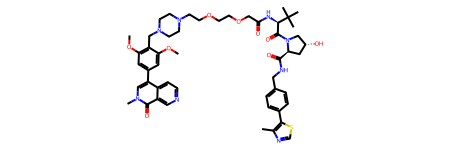

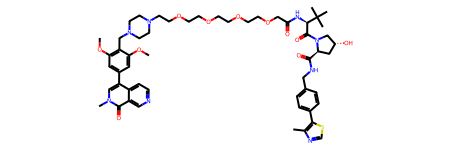

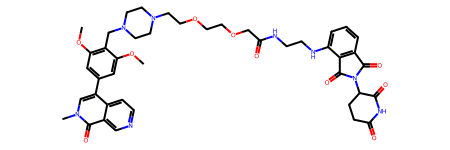

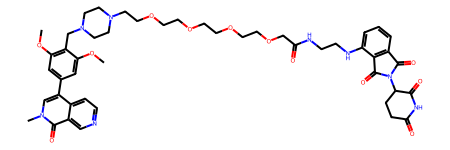

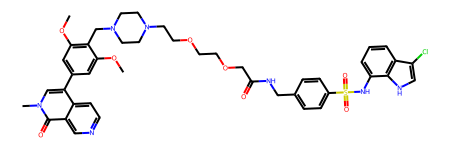

In [136]:
# Draw some PROTAC molecules using RDKit
from rdkit.Chem import Draw

# Draw the first 10 PROTACs from PROTAC-DB
protac_db_mols = [Chem.MolFromSmiles(smiles) for smiles in protac_db_df['Smiles'].unique()[:5]]
protac_db_mols = [mol for mol in protac_db_mols if mol is not None]
protac_db_mols = protac_db_mols[:5]
for mol in protac_db_mols:
    display(mol)
# img = Draw.MolsToGridImage(protac_db_mols, molsPerRow=5, subImgSize=(200, 200))
# img

## Bar Plots of Performance Metrics

In [137]:
from typing import Optional, List, Dict

In [138]:
reports['test'].columns

Index(['train_loss', 'train_loss_step', 'train_loss_epoch', 'train_acc',
       'train_acc_epoch', 'train_f1_score', 'train_f1_score_epoch',
       'train_precision', 'train_precision_epoch', 'train_recall',
       'train_recall_epoch', 'train_roc_auc', 'train_roc_auc_epoch',
       'test_loss', 'test_acc', 'test_f1_score', 'test_precision',
       'test_recall', 'test_roc_auc', 'model_type', 'test_model_id',
       'train_len', 'train_active_perc', 'train_inactive_perc',
       'train_avg_tanimoto_dist', 'test_len', 'test_active_perc',
       'test_inactive_perc', 'test_avg_tanimoto_dist',
       'num_leaking_uniprot_train_test', 'num_leaking_smiles_train_test',
       'perc_leaking_uniprot_train_test', 'perc_leaking_smiles_train_test',
       'split_type'],
      dtype='object')

Pytorch performances:
Metrics: ['Accuracy', 'ROC AUC']


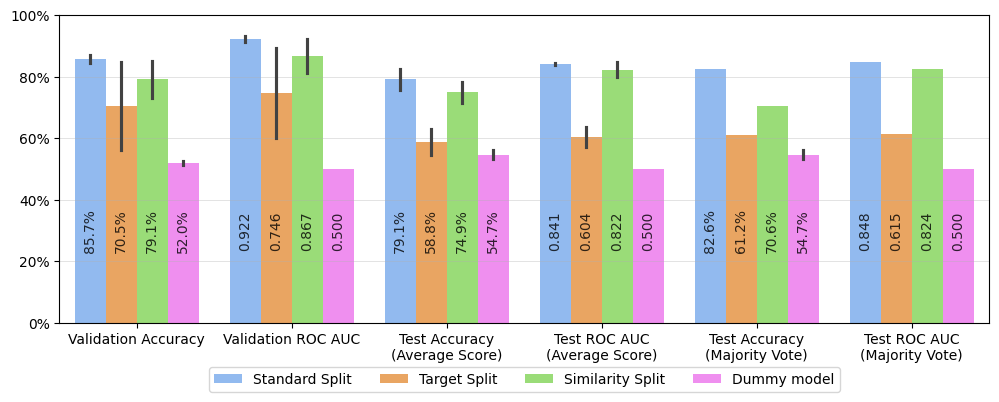

Metric: Accuracy


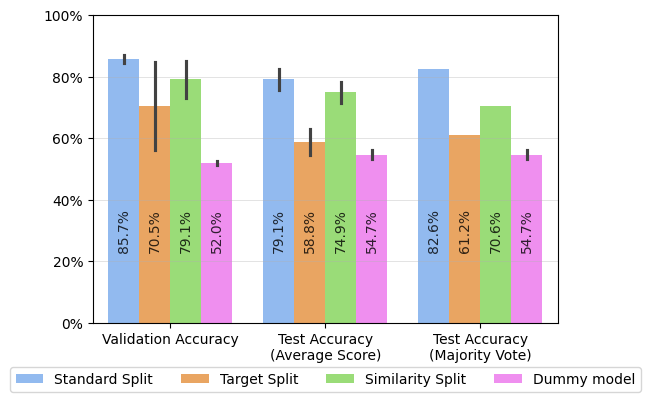

Metric: ROC AUC


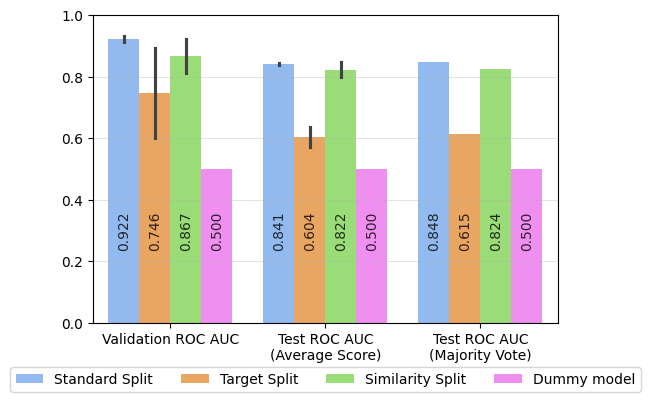

Plotting performance for main part of the paper...


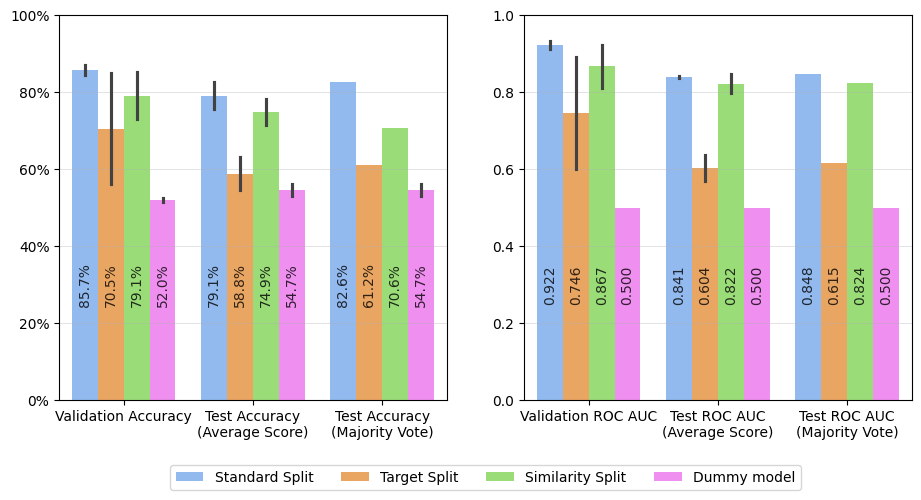

In [139]:
def plot_combined_data(combined_data: pd.DataFrame, title: str, show_plot: bool = False, metrics: List = ['Accuracy']) -> None:
    num_metrics = len(metrics)
    plt.figure(figsize=(6 * num_metrics, 4)) # 12,6
    sns.barplot(
        data=combined_data,
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette)
    plt.title('')
    plt.ylabel('')
    plt.xlabel('')
    plt.ylim(0, 1.0)  # Assuming scores are normalized between 0 and 1
    plt.grid(axis='y', alpha=0.5, linewidth=0.5)

    # Make the y-axis as percentage
    if 'Accuracy' in metrics:
        plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # Plot the legend below the x-axis, outside the plot, and divided in two columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4)

    # For each bar, add the rotated value (as percentage), inside the bar
    for i, p in enumerate(plt.gca().patches):
        # TODO: For some reasons, there are 4 additional rectangles being
        # plotted... I suspect it's because the dummy_df doesn't have the same
        # shape as the df containing all the evaluation data...
        if p.get_height() < 0.01:
            continue

        if num_metrics == 1:
            if 'Accuracy' in metrics:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
        else:
            if i % 2 == 0:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
        
        # print(f'Plotting value: {p.get_height():.5f} -> {value}')
        x = p.get_x() + p.get_width() / 2
        y = 0.3 # p.get_height() - p.get_height() / 2
        plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    plt.savefig(f'plots/{title}.png', bbox_inches='tight')
    if show_plot:
        plt.show()
    
    # print(combined_data.to_markdown(index=False))


def plot_performance_metrics(
        df_cv: pd.DataFrame,
        df_test: pd.DataFrame,
        df_test_majority: Optional[pd.DataFrame] = None,
        title: Optional[str] = None,
        show_plot: bool = False,
        metrics_to_plot: Dict[str, str] = {
            'val_acc': 'Validation Accuracy',
            'val_roc_auc': 'Validation ROC AUC',
            'test_acc': 'Test Accuracy',
            'test_roc_auc': 'Test ROC AUC',
        },
) -> None:
    # Extract and prepare CV data
    val_metrics = [k for k in metrics_to_plot.keys() if 'val' in k]
    cv_data = df_cv[['model_type', 'fold', 'split_type'] + val_metrics]
    cv_data = cv_data.melt(id_vars=['model_type', 'fold', 'split_type'], var_name='Metric', value_name='Score')
    cv_data['Metric'] = cv_data['Metric'].replace(metrics_to_plot)
    cv_data['Stage'] = cv_data['Metric'].apply(lambda x: 'Validation' if 'Val' in x else 'Test')
    # Remove test data from CV data
    cv_data = cv_data[cv_data['Stage'] == 'Validation']

    # Extract and prepare test data
    test_metrics = [k for k in metrics_to_plot.keys() if 'test' in k]
    test_data = df_test[['model_type', 'split_type'] + test_metrics]
    test_data = test_data.melt(id_vars=['model_type', 'split_type'], var_name='Metric', value_name='Score')
    # Add a suffix to the metric name to differentiate from the majority score
    test_data['Metric'] = test_data['Metric'].replace({k: f'{v}\n(Average Score)' for k, v in metrics_to_plot.items()})
    test_data['Stage'] = '(Average Score)'

    # Combine CV and test data
    combined_data = pd.concat([cv_data, test_data], ignore_index=True)

    if df_test_majority is not None:
        # Extract and prepare test data
        test_data_majority = df_test_majority[['model_type', 'split_type'] + test_metrics]
        test_data_majority = test_data_majority.melt(id_vars=['model_type', 'split_type'], var_name='Metric', value_name='Score')
        # Add a suffix to the metric name to differentiate from the average score
        test_data_majority['Metric'] = test_data_majority['Metric'].replace({k: f'{v}\n(Majority Vote)' for k, v in metrics_to_plot.items()})
        test_data_majority['Stage'] = '(Majority Vote)'
        combined_data = pd.concat([combined_data, test_data_majority], ignore_index=True)

    # Rename 'split_type' values according to a predefined map for clarity
    group2name = {
        'random': 'Standard Split',
        'uniprot': 'Target Split',
        'tanimoto': 'Similarity Split',
        'standard': 'Standard Split',
        'target': 'Target Split',
        'similarity': 'Similarity Split',
    }
    combined_data['Split Type'] = combined_data['split_type'].map(group2name)

    # Add dummy model data
    dummy_val_acc = []
    dummy_test_acc = []
    for i, group in enumerate(group2name.keys()):
        # Get the majority class in group_df
        group_df = df_cv[df_cv['split_type'] == group]
        major_col = 'inactive' if group_df['val_inactive_perc'].mean() > 0.5 else 'active'
        dummy_val_acc.append(group_df[f'val_{major_col}_perc'].mean())

        group_df = df_test[df_test['split_type'] == group]
        major_col = 'inactive' if group_df['test_inactive_perc'].mean() > 0.5 else 'active'
        dummy_test_acc.append(group_df[f'test_{major_col}_perc'].mean())

    dummy_scores = []
    for i in range(len(dummy_val_acc)):
        metrics = {
            'Validation Accuracy': dummy_val_acc[i],
            'Test Accuracy\n(Average Score)': dummy_test_acc[i],
        }
        # All other metrics are set to 0.5 (i.e., random guessing)
        for k, v in metrics_to_plot.items():
            if 'acc' not in k:
                if 'val' not in k:
                    metrics[f'{v}\n(Average Score)'] = 0.5
                    metrics[f'{v}\n(Majority Vote)'] = 0.5
                else:
                    metrics[v] = 0.5

        if df_test_majority is not None:
            metrics['Test Accuracy\n(Majority Vote)'] = dummy_test_acc[i]

        for metric, score in metrics.items():
            dummy_scores.append({
                'Experiment': i,
                'Metric': metric,
                'Score': score,
                'Split Type': 'Dummy model',
            })
    dummy_model = pd.DataFrame(dummy_scores)
    combined_data = pd.concat([combined_data, dummy_model], ignore_index=True)

    # Plotting
    metrics = list({k.replace('Test ', '').replace('Validation ', '') for k in metrics_to_plot.values()})
    print(f'Metrics: {metrics}')
    num_metrics = len(metrics)

    plot_combined_data(combined_data, title, show_plot, metrics)

    for metric in metrics:
        print(f'Metric: {metric}')
        # Plot the data for the current metric
        metric_data = combined_data[combined_data['Metric'].str.contains(metric)]
        plot_combined_data(metric_data, f'{title}_{metric}', show_plot, [metric])

    # plt.figure(figsize=(6 * num_metrics, 6)) # 12,6
    # sns.barplot(
    #     data=combined_data,
    #     x='Metric',
    #     y='Score',
    #     hue='Split Type',
    #     errorbar=('sd', 1),
    #     palette=palette)
    # plt.title('')
    # plt.ylabel('')
    # plt.xlabel('')
    # plt.ylim(0, 1.0)  # Assuming scores are normalized between 0 and 1
    # plt.grid(axis='y', alpha=0.5, linewidth=0.5)

    # # Make the y-axis as percentage
    # plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # # Plot the legend below the x-axis, outside the plot, and divided in two columns
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4)

    # # For each bar, add the rotated value (as percentage), inside the bar
    # for i, p in enumerate(plt.gca().patches):
    #     # TODO: For some reasons, there are 4 additional rectangles being
    #     # plotted... I suspect it's because the dummy_df doesn't have the same
    #     # shape as the df containing all the evaluation data...
    #     if p.get_height() < 0.01:
    #         continue
    #     if i % 2 == 0:
    #         value = f'{p.get_height():.1%}'
    #     else:
    #         value = f'{p.get_height():.3f}'
        
    #     # print(f'Plotting value: {p.get_height():.5f} -> {value}')
    #     x = p.get_x() + p.get_width() / 2
    #     y = 0.4 # p.get_height() - p.get_height() / 2
    #     plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    # # plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    # if show_plot:
    #     plt.show()

    print('Plotting performance for main part of the paper...')

    # Plot in the same above the accuracy and the ROC AUC in two different subplots
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    sns.barplot(
        data=combined_data[combined_data['Metric'].str.contains('Accuracy')],
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette,
        ax=axes[0])
    sns.barplot(
        data=combined_data[combined_data['Metric'].str.contains('ROC AUC')],
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette,
        ax=axes[1])
    # axes[0].set_title('Accuracy')
    axes[0].set_ylabel('')
    axes[0].set_xlabel('')
    axes[0].set_ylim(0, 1.0)
    axes[0].grid(axis='y', alpha=0.5, linewidth=0.5)
    axes[0].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    axes[0].legend().remove()

    # axes[1].set_title('ROC AUC')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylim(0, 1.0)
    axes[1].grid(axis='y', alpha=0.5, linewidth=0.5)
    # axes[1].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    axes[1].legend().remove()

    # For each bar in both subplots, add the rotated value (as percentage), inside the bar
    for i, ax in enumerate(axes):
        for p in ax.patches:
            if p.get_height() < 0.01:
                continue
            if i % 2 == 0:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
            
            x = p.get_x() + p.get_width() / 2
            y = 0.3 # p.get_height() - p.get_height() / 2
            ax.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15), ncol=4)
    plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    if show_plot:
        plt.show()

print('Pytorch performances:')
plot_performance_metrics(
    df_cv=reports['cv_train'],
    df_test=reports['test'],
    df_test_majority=reports['majority_vote'][reports['majority_vote']['cv_models'].isna()],
    title=f'summary_performance-best_models_as_test',
    show_plot=True,
)

### PyTorch Plots

Pytorch performances:
Metrics: ['ROC AUC', 'Recall', 'Precision', 'F1 Score', 'Accuracy']


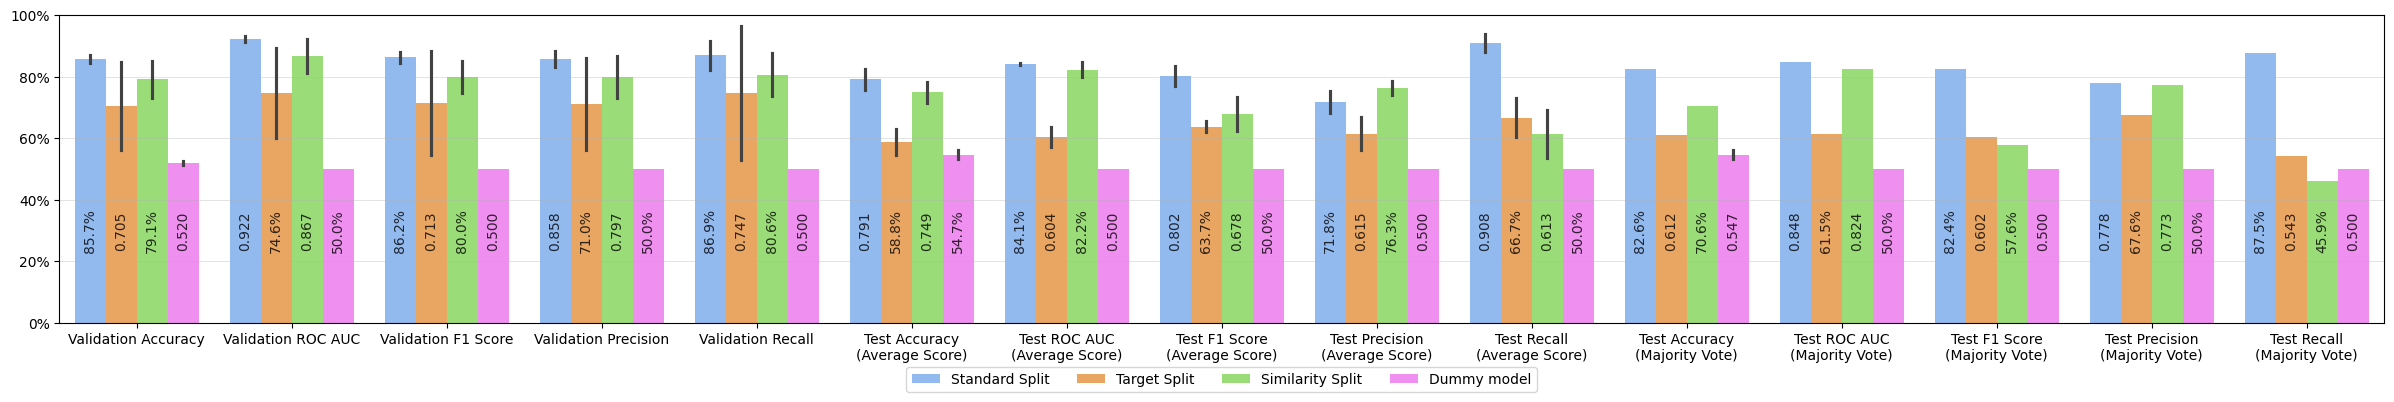

Metric: ROC AUC


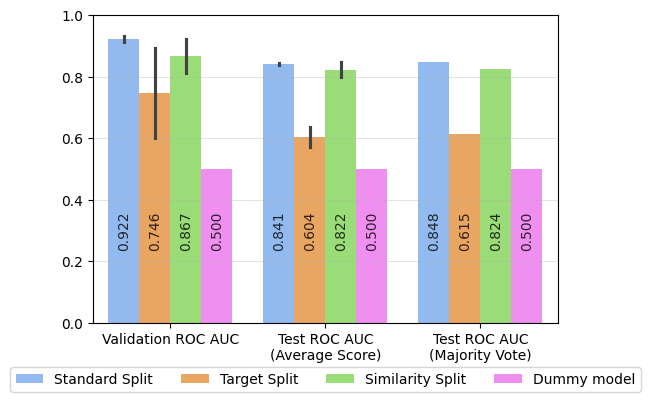

Metric: Recall


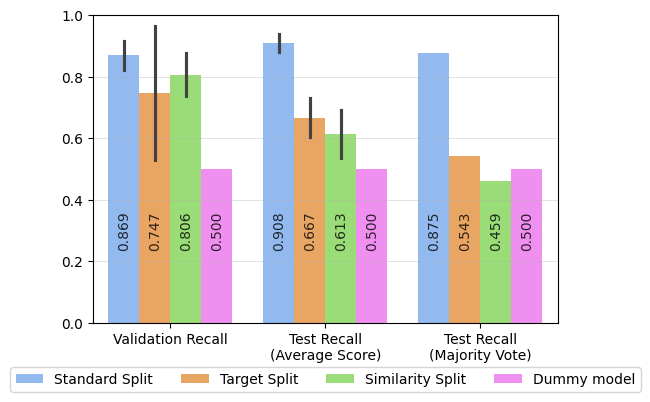

Metric: Precision


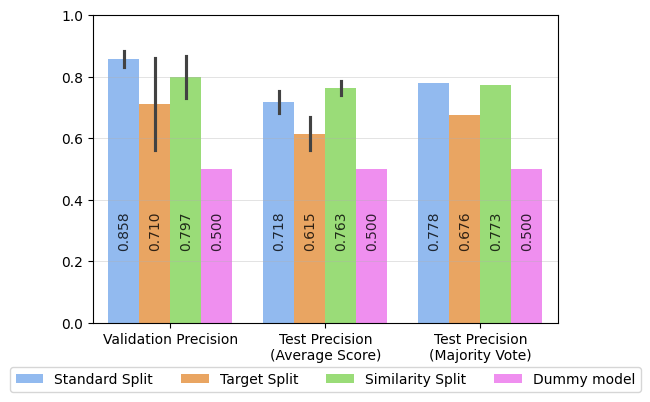

Metric: F1 Score


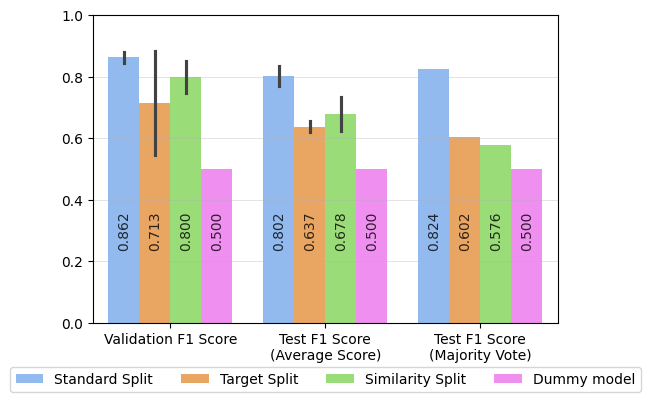

Metric: Accuracy


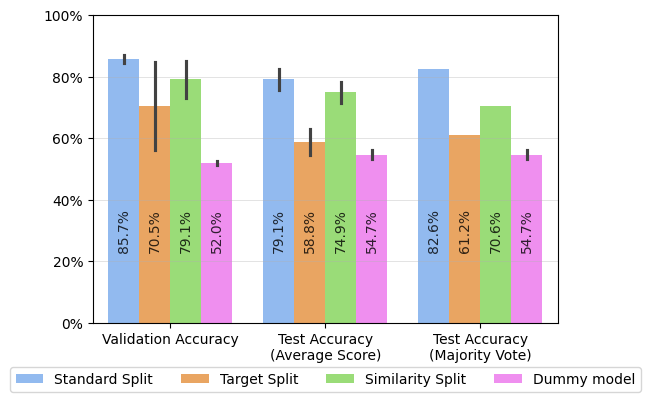

Plotting performance for main part of the paper...


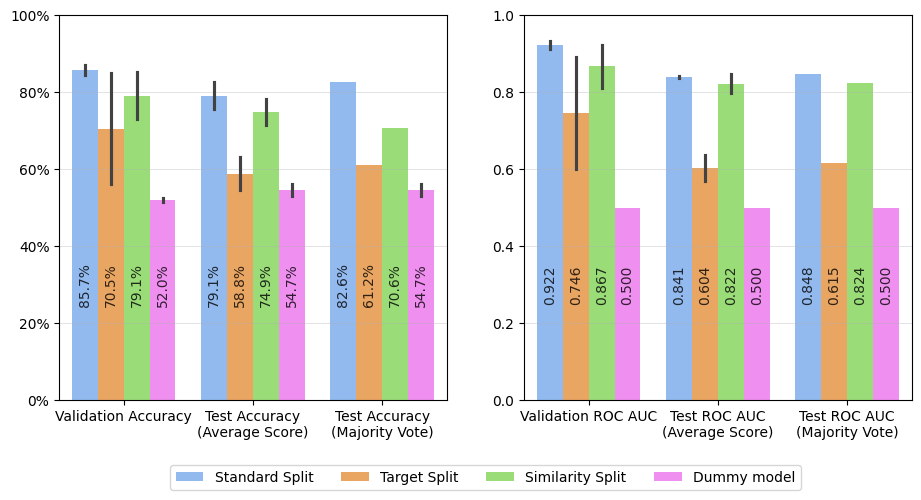

In [140]:
print('Pytorch performances:')
plot_performance_metrics(
    df_cv=reports['cv_train'],
    df_test=reports['test'],
    df_test_majority=reports['majority_vote'][reports['majority_vote']['cv_models'].isna()],
    title=f'pytorch_performance',
    show_plot=True,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### XGBoost Plots

XGBoost performances:
Metrics: ['ROC AUC', 'Recall', 'Precision', 'F1 Score', 'Accuracy']


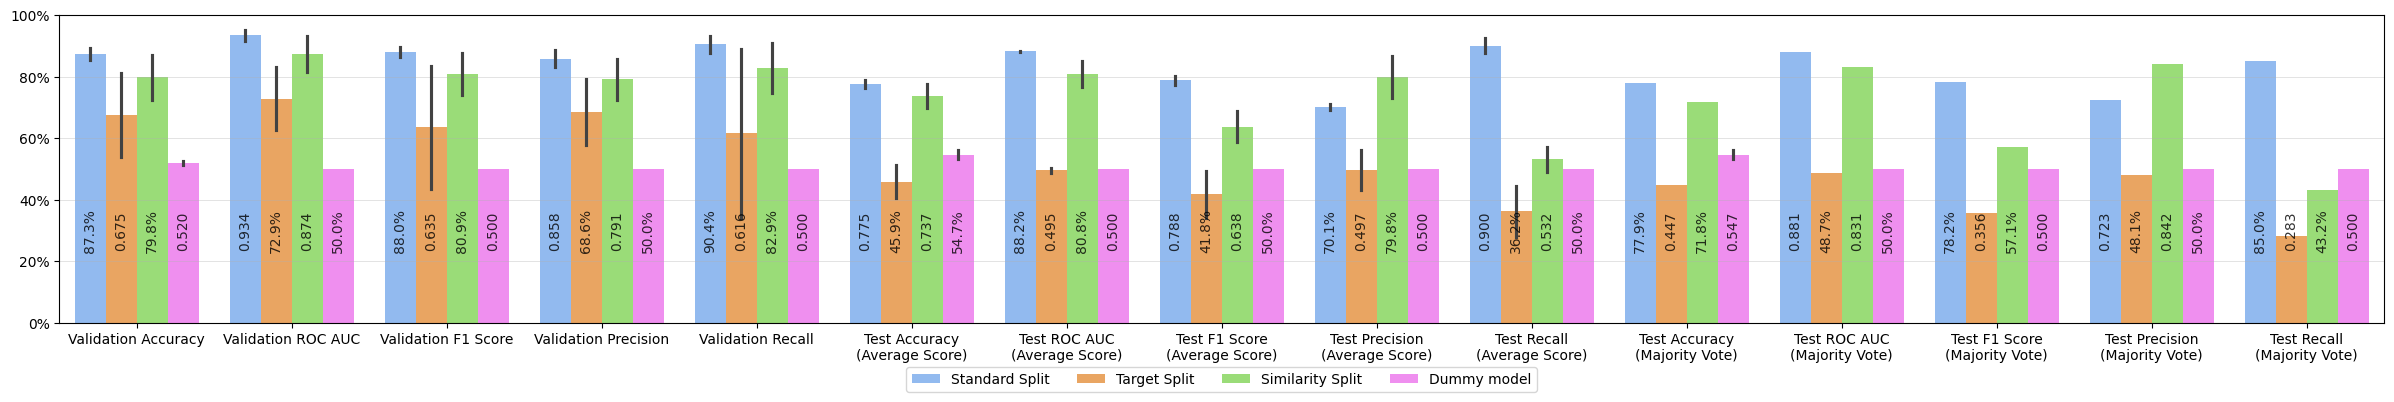

Metric: ROC AUC


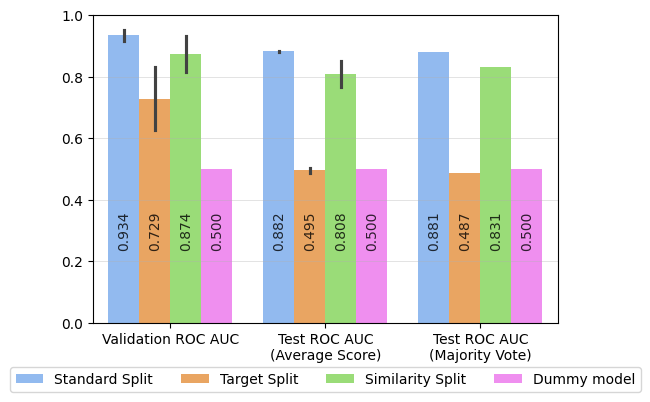

Metric: Recall


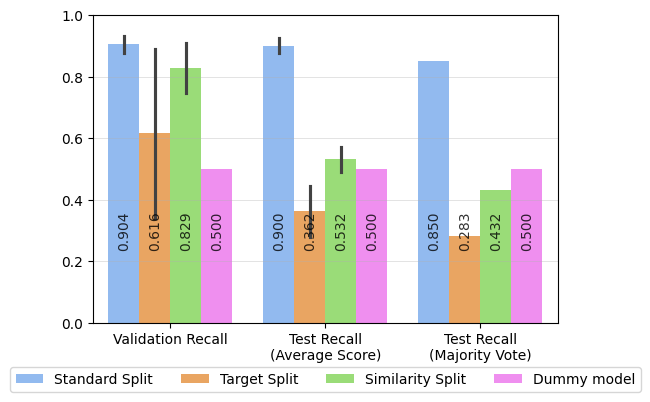

Metric: Precision


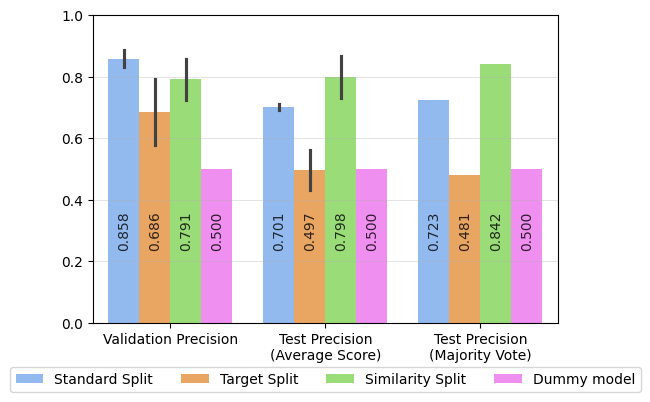

Metric: F1 Score


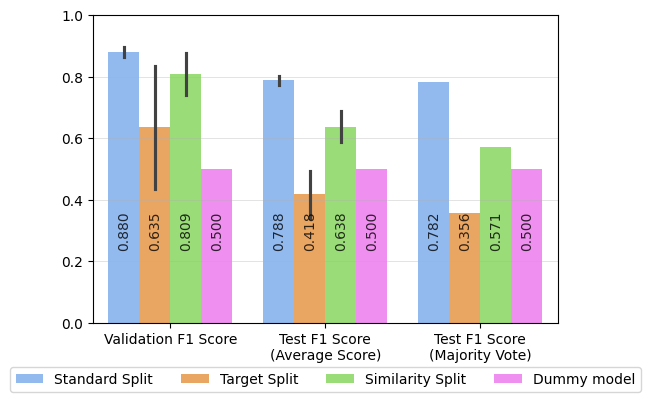

Metric: Accuracy


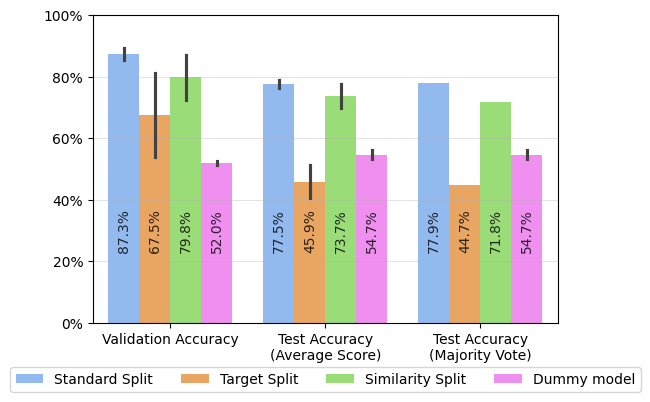

Plotting performance for main part of the paper...


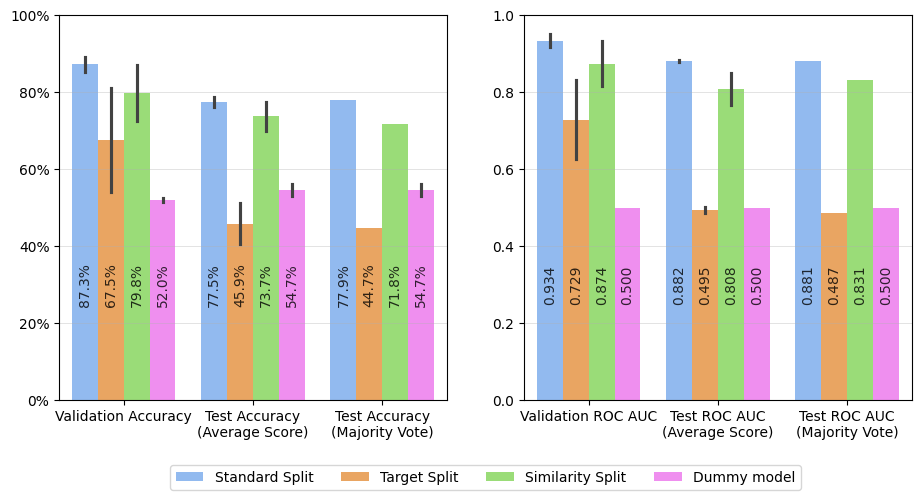

In [141]:
print('XGBoost performances:')
plot_performance_metrics(
    df_cv=reports['xgboost_cv_train'],
    df_test=reports['xgboost_test'],
    df_test_majority=reports['xgboost_majority_vote'],
    title=f'xgboost_performance',
    show_plot=True,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### Cells as One-Hot Encoded

Cells as one-hot performances:
Metrics: ['ROC AUC', 'Recall', 'Precision', 'F1 Score', 'Accuracy']


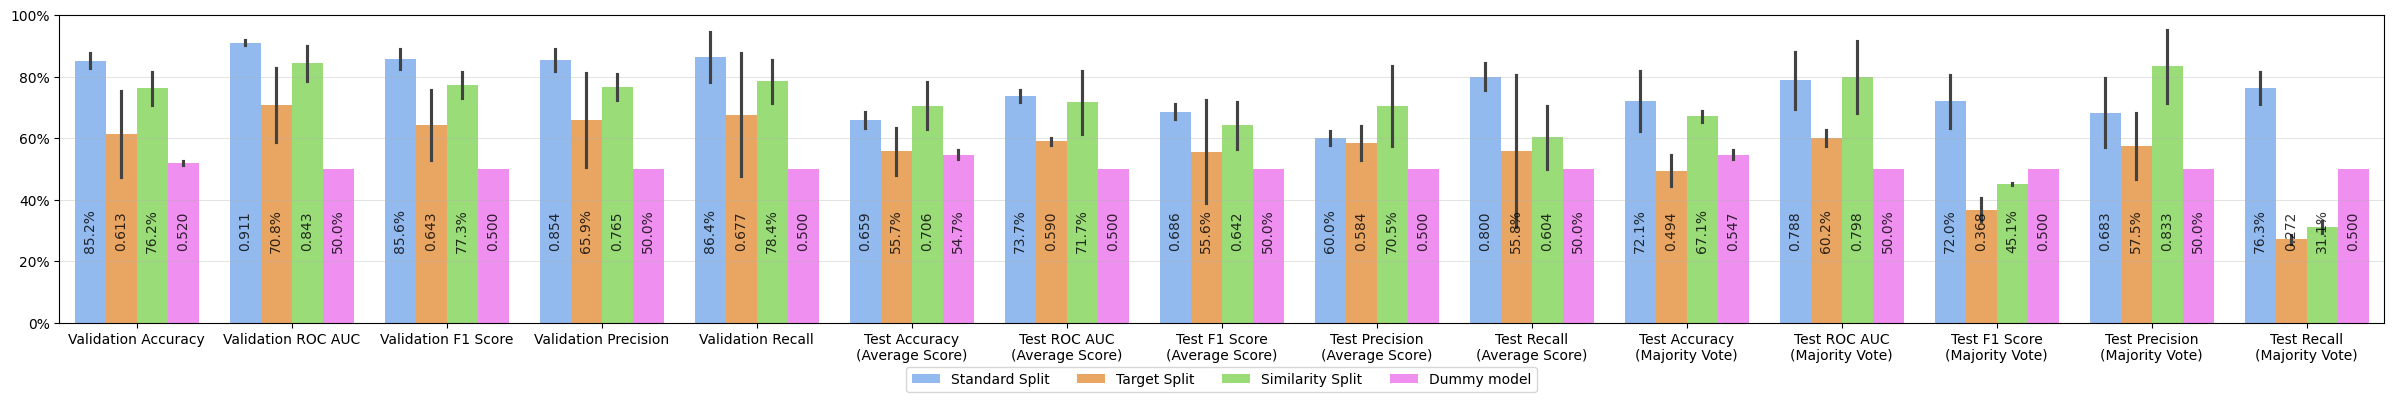

Metric: ROC AUC


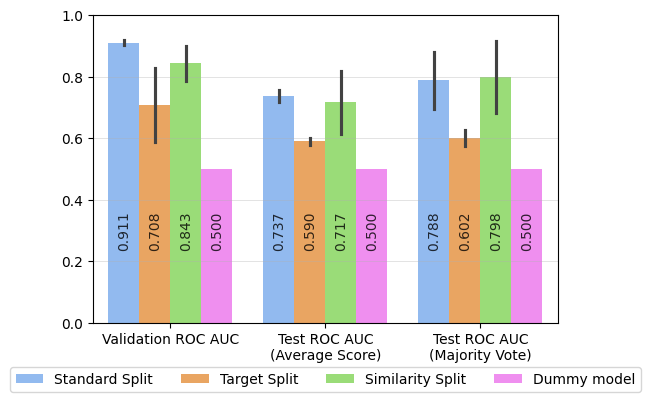

Metric: Recall


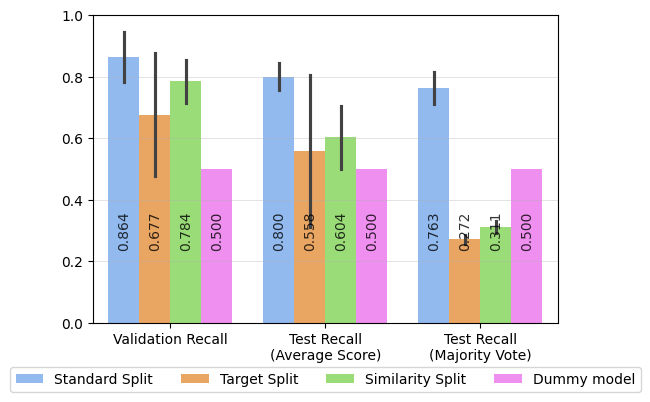

Metric: Precision


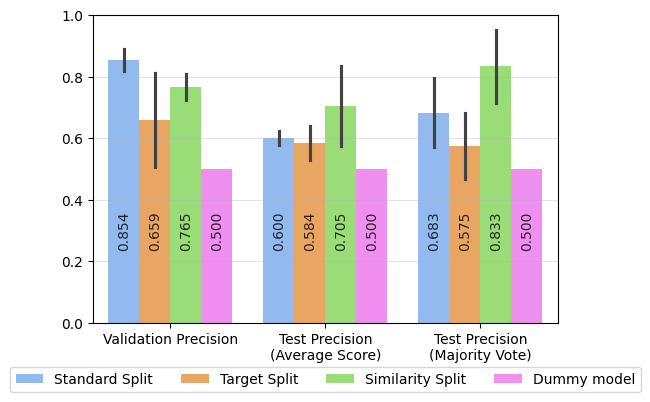

Metric: F1 Score


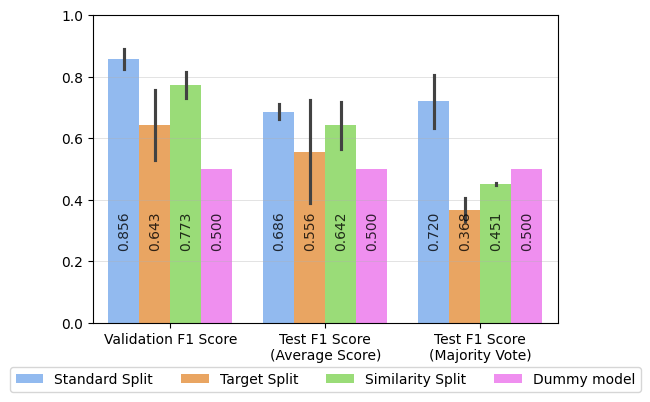

Metric: Accuracy


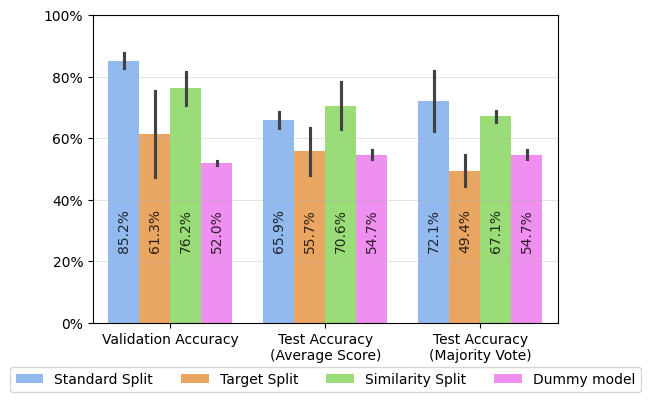

Plotting performance for main part of the paper...


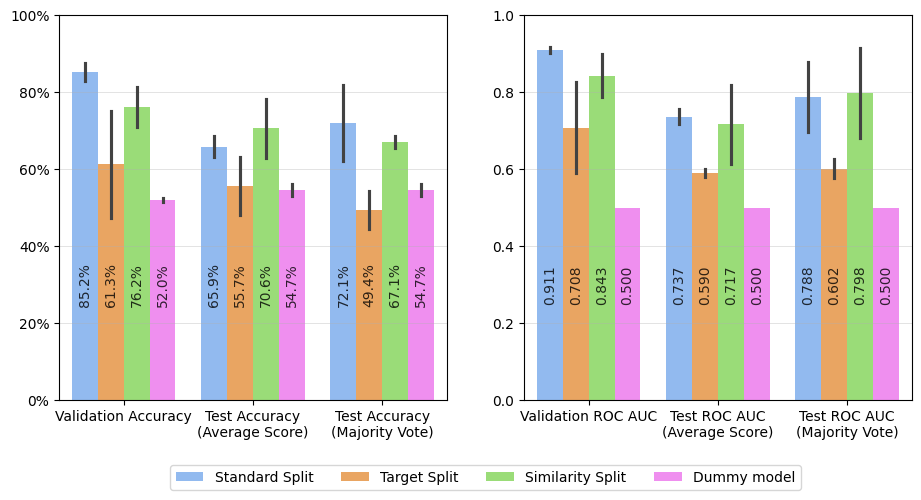

In [142]:
print('Cells as one-hot performances:')
plot_performance_metrics(
    df_cv=reports['cellsonehot_cv_train'],
    df_test=reports['cellsonehot_test'],
    df_test_majority=reports['cellsonehot_majority_vote'],
    title=f'cellsonehot_performance',
    show_plot=True,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### Proteins as Amino-Acid Counts

Proteins as amino-acid counts performances:
Metrics: ['ROC AUC', 'Recall', 'Precision', 'F1 Score', 'Accuracy']


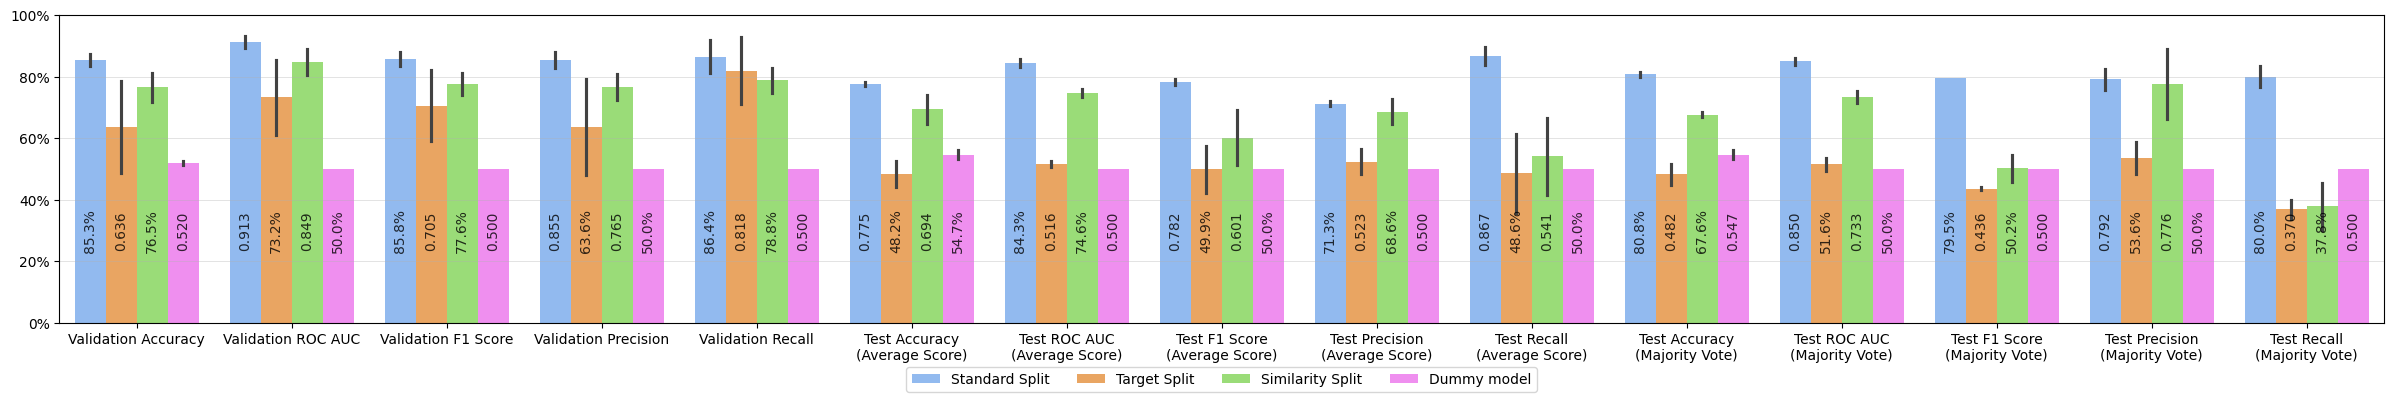

Metric: ROC AUC


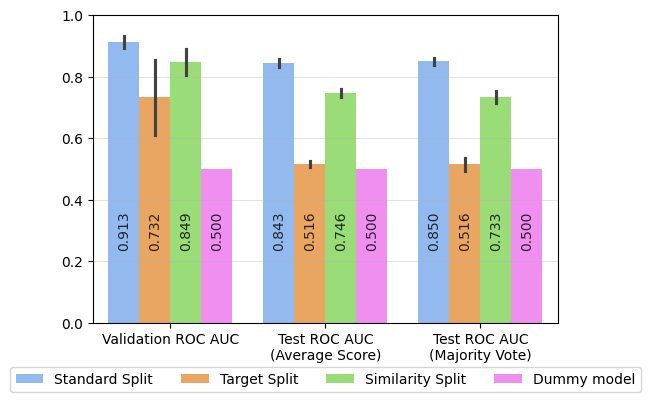

Metric: Recall


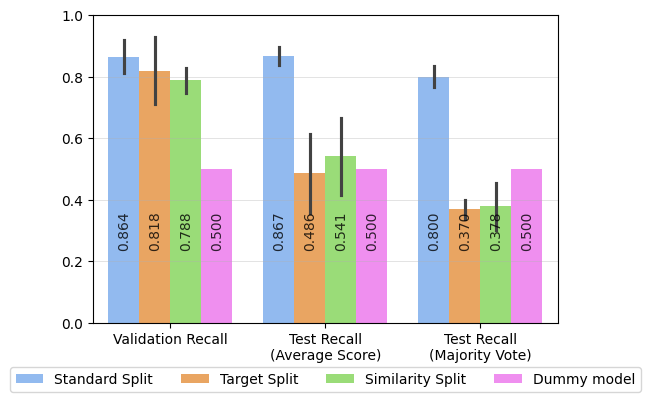

Metric: Precision


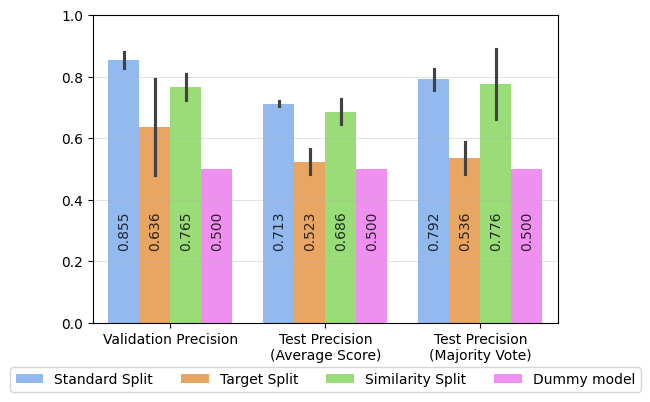

Metric: F1 Score


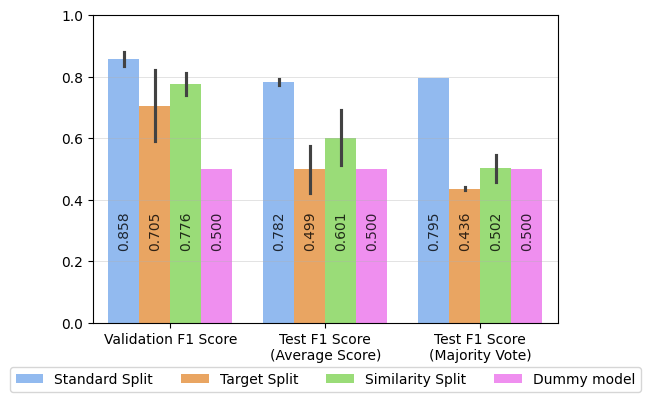

Metric: Accuracy


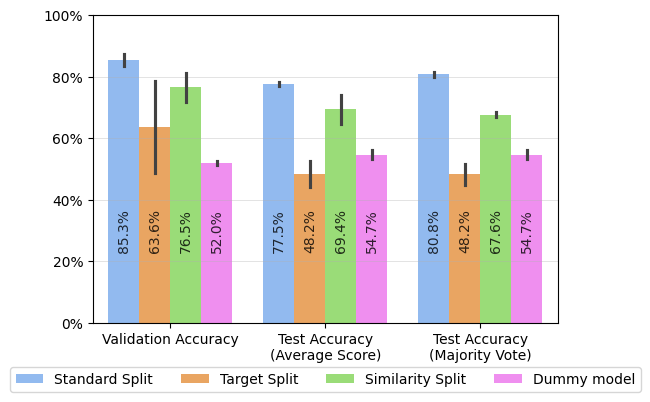

Plotting performance for main part of the paper...


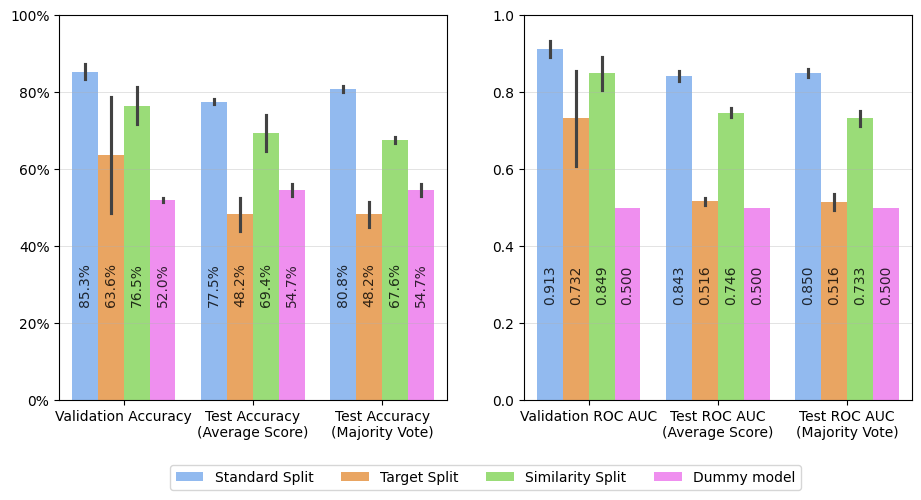

In [143]:
print('Proteins as amino-acid counts performances:')
plot_performance_metrics(
    df_cv=reports['aminoacidcnt_cv_train'],
    df_test=reports['aminoacidcnt_test'],
    df_test_majority=reports['aminoacidcnt_majority_vote'],
    title=f'aminoacidcnt_performance',
    show_plot=True,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### Compare Performance

/tmp/ipykernel_2173070/2061096750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Experiment'] = r
/tmp/ipykernel_2173070/2061096750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Experiment'] = r
/tmp/ipykernel_2173070/2061096750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

| Experiment                    | Study      |   Test Accuracy |   Test ROC AUC |
|:------------------------------|:-----------|----------------:|---------------:|
| Baseline                      | Standard   |        0.825581 |       0.847826 |
| Baseline                      | Target     |        0.611765 |       0.614827 |
| Baseline                      | Similarity |        0.705882 |       0.823761 |
| Cells as one-hot              | Standard   |        0.651163 |       0.722826 |
| Cells as one-hot              | Target     |        0.458824 |       0.619844 |
| Cells as one-hot              | Similarity |        0.658824 |       0.715653 |
| Proteins as amino-acid counts | Standard   |        0.802326 |       0.842391 |
| Proteins as amino-acid counts | Target     |        0.505882 |       0.530658 |
| Proteins as amino-acid counts | Similarity |        0.670588 |       0.719032 |
--------------------------------------------------------------------------------
Comparison of the

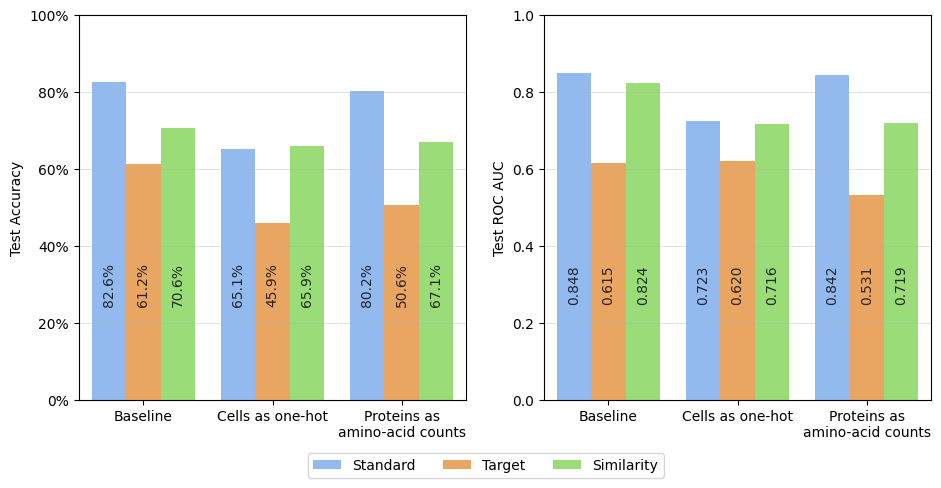

In [146]:
df = []
for r in ['majority_vote', 'cellsonehot_majority_vote', 'aminoacidcnt_majority_vote']:
    tmp = reports[r]
    tmp = tmp[tmp['cv_models'].isna()]
    tmp['Experiment'] = r
    df.append(tmp)
df = pd.concat(df)
# Rename split_type to paper names
df['split_type'] = df['split_type'].replace({
    'random': 'Standard',
    'uniprot': 'Target',
    'tanimoto': 'Similarity',
    'standard': 'Standard',
    'target': 'Target',
    'similarity': 'Similarity',
})
# Rename columns to paper names
df.rename(columns={
    'split_type': 'Study',
    'test_acc': 'Test Accuracy',
    'test_roc_auc': 'Test ROC AUC',
}, inplace=True)
# Rename experiment names to paper names
df['Experiment'] = df['Experiment'].replace({
    'majority_vote': 'Baseline',
    'cellsonehot_majority_vote': 'Cells as one-hot',
    'aminoacidcnt_majority_vote': 'Proteins as amino-acid counts',
})
print(df[['Experiment', 'Study', 'Test Accuracy', 'Test ROC AUC']].to_markdown(index=False))
df['Experiment'] = df['Experiment'] = df['Experiment'].replace({
    'Proteins as amino-acid counts': 'Proteins as\namino-acid counts',
})

def plot_comparison_df(df, filename=None):
    # Plot the test accuracy and ROC AUC in two bar-plots side by side, with Study as hue
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    sns.barplot(
        data=df,
        x='Experiment',
        y='Test Accuracy',
        hue='Study',
        errorbar=('sd', 1),
        palette=palette[:3],
        ax=axes[0])
    # Set ax[0] y-axis to percentage
    axes[0].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # Set ax[0] y-axis limit from 0 to 100
    axes[0].set_ylim(0, 1.0)
    # Remove the x-axis label
    axes[0].set_xlabel('')
    axes[0].grid(axis='y', alpha=0.5, linewidth=0.5)

    sns.barplot(
        data=df,
        x='Experiment',
        y='Test ROC AUC',
        hue='Study',
        errorbar=('sd', 1),
        palette=palette[:3],
        ax=axes[1])
    axes[1].set_ylim(0, 1.0)
    # Remove the legend from the first plot
    axes[0].legend().remove()
    # Set the legend outside the plot in the middle of the two subplots (3 columns)
    axes[1].legend(loc='upper center', bbox_to_anchor=(-0.15, -0.12), ncol=3)
    # Remove the x-axis label
    axes[1].set_xlabel('')
    axes[1].grid(axis='y', alpha=0.5, linewidth=0.5)

    # Add values to the bar plots rotated 90 degrees at 0.5 height
    for i, ax in enumerate(axes):
        for p in ax.patches:
            if p.get_height() < 0.01:
                continue
            if i % 2 == 0:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
            
            x = p.get_x() + p.get_width() / 2
            y = 0.3
            ax.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    if filename is not None:
        plt.savefig(f'plots/{filename}.pdf', bbox_inches='tight')
        plt.savefig(f'plots/{filename}.png', bbox_inches='tight')
    plt.show()

print('-' * 80)
print('Comparison of the best models majority vote:')
plot_comparison_df(df, 'embedding_comparison_majority_vote')

| Experiment                    | Study      |   Test Accuracy |   Test ROC AUC |
|:------------------------------|:-----------|----------------:|---------------:|
| Baseline                      | Similarity |        0.74902  |       0.822072 |
| Baseline                      | Standard   |        0.790698 |       0.84058  |
| Baseline                      | Target     |        0.588235 |       0.604051 |
| Cells as one-hot              | Similarity |        0.705882 |       0.716592 |
| Cells as one-hot              | Standard   |        0.658915 |       0.736594 |
| Cells as one-hot              | Target     |        0.556863 |       0.589929 |
| Proteins as amino-acid counts | Similarity |        0.694118 |       0.746434 |
| Proteins as amino-acid counts | Standard   |        0.775194 |       0.842935 |
| Proteins as amino-acid counts | Target     |        0.482353 |       0.516165 |
--------------------------------------------------------------------------------
Comparison of the

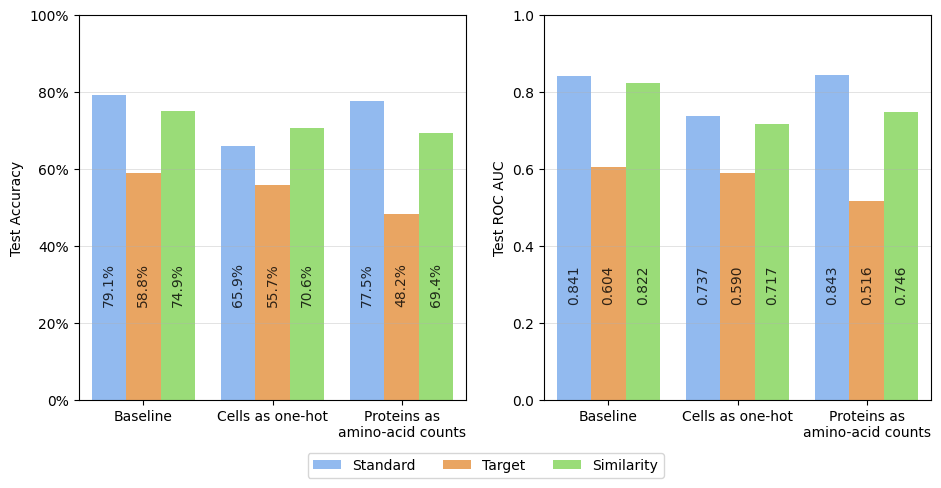

In [147]:
df = []
for r in ['test', 'cellsonehot_test', 'aminoacidcnt_test']:
    tmp = reports[r]
    tmp['Experiment'] = r
    df.append(tmp)
df = pd.concat(df)
# Rename split_type to paper names
df['split_type'] = df['split_type'].replace({
    'random': 'Standard',
    'uniprot': 'Target',
    'tanimoto': 'Similarity',
    'standard': 'Standard',
    'target': 'Target',
    'similarity': 'Similarity',
})
# Rename columns to paper names
df.rename(columns={
    'split_type': 'Study',
    'test_acc': 'Test Accuracy',
    'test_roc_auc': 'Test ROC AUC',
}, inplace=True)
# Group by experiment and split type then get the mean
df = df.groupby(['Experiment', 'Study']).mean(['Test Accuracy', 'Test ROC AUC']).reset_index()
# Rename experiment names to paper names
df['Experiment'] = df['Experiment'].replace({
    'test': 'Baseline',
    'cellsonehot_test': 'Cells as one-hot',
    'aminoacidcnt_test': 'Proteins as amino-acid counts',
})
# Order df by Experiment
df = df.sort_values(['Experiment'])
# Order Study by ['Standard', 'Target', 'Similarity']
df['Study'] = pd.Categorical(df['Study'], ['Standard', 'Target', 'Similarity'])

print(df[['Experiment', 'Study', 'Test Accuracy', 'Test ROC AUC']].to_markdown(index=False))
df['Experiment'] = df['Experiment'] = df['Experiment'].replace({
    'Proteins as amino-acid counts': 'Proteins as\namino-acid counts',
})

print('-' * 80)
print('Comparison of the best models mean values:')
plot_comparison_df(df, 'embedding_comparison_mean')

## Ablation Studies

/tmp/ipykernel_2173070/464303105.py:72: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,
/tmp/ipykernel_2173070/464303105.py:72: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,
/tmp/ipykernel_2173070/464303105.py:72: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


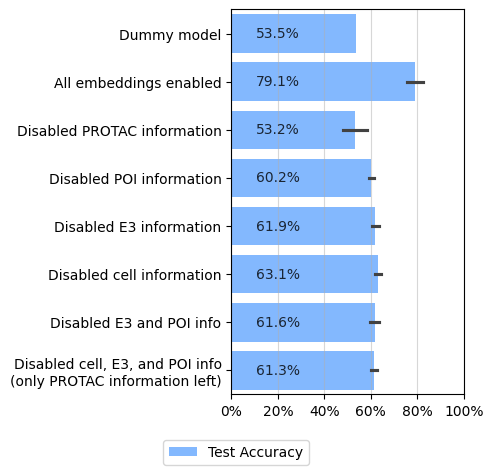

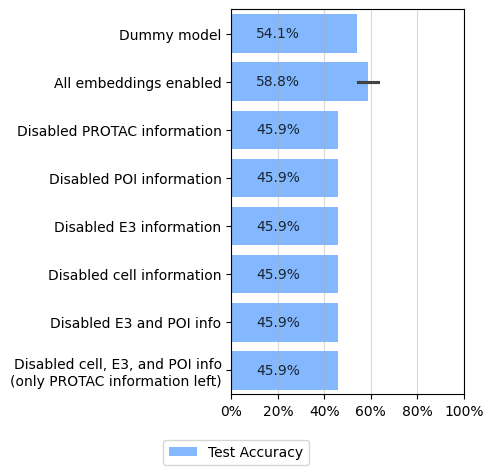

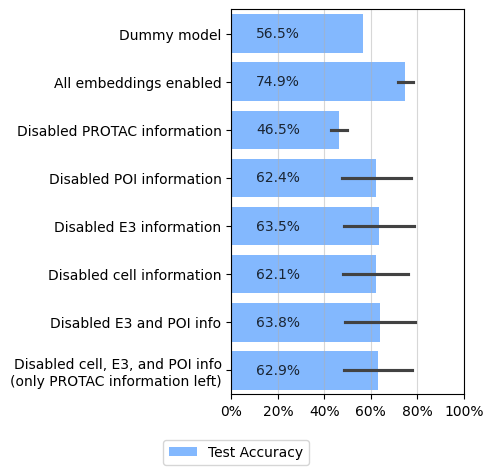

In [18]:
def plot_ablation_study(report):
    # Define the ablation study combinations
    ablation_study_combinations = [
        'disabled smiles',
        'disabled poi',
        'disabled e3',
        'disabled cell',
        'disabled poi e3',
        'disabled poi e3 smiles',
        'disabled poi e3 cell',
    ]

    for group in report['split_type'].unique():    
        baseline = report[report['disabled_embeddings'].isna()].copy()
        baseline = baseline[baseline['split_type'] == group]
        baseline['disabled_embeddings'] = 'all embeddings enabled'
        # metrics_to_show = ['val_acc', 'test_acc']
        metrics_to_show = ['test_acc']
        # baseline = baseline.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
        baseline = baseline.melt(id_vars=['disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')

        ablation_dfs = []
        for disabled_embeddings in ablation_study_combinations:
            tmp = report[report['disabled_embeddings'] == disabled_embeddings].copy()
            tmp = tmp[tmp['split_type'] == group]
            # tmp = tmp.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
            tmp = tmp.melt(id_vars=['disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
            ablation_dfs.append(tmp)
        ablation_df = pd.concat(ablation_dfs)

        dummy_test_df = pd.DataFrame()
        tmp = report[report['split_type'] == group]
        dummy_test_df['score'] = tmp[['test_active_perc', 'test_inactive_perc']].max(axis=1)
        dummy_test_df['metric'] = 'test_acc'
        dummy_test_df['disabled_embeddings'] = 'dummy'

        # dummy_df = pd.concat([dummy_val_df, dummy_test_df])
        dummy_df = dummy_test_df

        final_df = pd.concat([dummy_df, baseline, ablation_df])

        final_df['metric'] = final_df['metric'].map({
            'val_acc': 'Validation Accuracy',
            'test_acc': 'Test Accuracy',
            'val_roc_auc': 'Val ROC-AUC',
            'test_roc_auc': 'Test ROC-AUC',
        })

        final_df['disabled_embeddings'] = final_df['disabled_embeddings'].map({
            'all embeddings enabled': 'All embeddings enabled',
            'dummy': 'Dummy model',
            'disabled smiles': 'Disabled PROTAC information',
            'disabled e3': 'Disabled E3 information',
            'disabled poi': 'Disabled POI information',
            'disabled cell': 'Disabled cell information',
            'disabled poi e3': 'Disabled E3 and POI info',
            'disabled poi e3 smiles': 'Disabled compound, E3, and POI info\n(only cell information left)',
            'disabled poi e3 cell': 'Disabled cell, E3, and POI info\n(only PROTAC information left)',
        })

        # Print final_df to latex
        tmp  = final_df.groupby(['disabled_embeddings', 'metric']).mean().round(3)
        # Remove fold column to tmp
        tmp = tmp.reset_index() #.drop('fold', axis=1)

        # print('DF to plot:\n', tmp.to_markdown(index=False))

        fig, ax = plt.subplots(figsize=(3, 5))
        
        # fig, ax = plt.subplots()

        sns.barplot(data=final_df,
            y='disabled_embeddings',
            x='score',
            hue='metric',
            ax=ax,
            errorbar=('sd', 1),
            palette=sns.color_palette(palette, len(palette)),
            saturation=1,
        )

        # ax.set_title(f'{group.replace("random", "standard")} CV split')
        ax.grid(axis='x', alpha=0.5)
        ax.tick_params(axis='y', rotation=0)
        ax.set_xlim(0, 1.0)
        ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Plot the legend below the x-axis, outside the plot
        ax.legend(loc='upper center', bbox_to_anchor=(0.02, -0.1))

        # For each bar, add the rotated value (as percentage), inside the bar
        for i, p in enumerate(plt.gca().patches):
            # TODO: For some reasons, there is an additional bar being added at
            # the end of the plot... it's not in the dataframe
            if i == len(plt.gca().patches) - 1:
                continue
            value = '{:.1f}%'.format(100 * p.get_width())
            y = p.get_y() + p.get_height() / 2
            x = 0.2 # p.get_height() - p.get_height() / 2
            plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, alpha=0.8)

        plt.savefig(f'plots/ablation_study_{group}.pdf', bbox_inches='tight')

reports['test']['disabled_embeddings'] = pd.NA
plot_ablation_study(pd.concat([
    reports['ablation'],
    reports['test'],
]))